In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz

--2021-02-06 08:02:26--  http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response...200 OK
Length: 247336696 (236M) [application/x-gzip]
Saving to: ‘notMNIST_large.tar.gz’

notMNIST_large.tar. 100%[===================>] 235.88M  37.4MB/s    in 6.5s    

2021-02-06 08:02:33 (36.4 MB/s) - ‘notMNIST_large.tar.gz’ saved [247336696/247336696]



In [2]:
!gunzip notMNIST_small.tar.gz

In [ ]:
!tar -xvf notMNIST_small.tar

total number of data : 18726


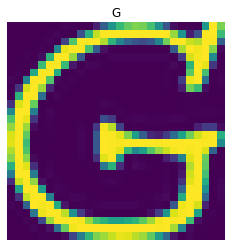

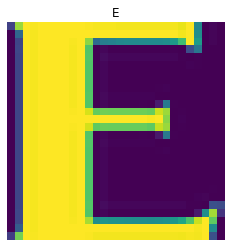

In [91]:
import os
import glob
from PIL import Image
import torch 
from torch.utils.data import Dataset, DataLoader 
import torchvision.transforms as transforms
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

class NotMNIST_Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir 
        self.transform = transform
        self.annotations = self._get_annotations()
        self.label = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6,
                "H": 7, "I": 8, "J": 9}

    def __len__(self):
        return len(self.annotations) 

    def __getitem__(self, index):
        image_path = os.path.join(self.root_dir, self.annotations.iloc[index, 1], self.annotations.iloc[index, 0])
        image = Image.open(image_path)
        target = torch.tensor(int(self.label[self.annotations.iloc[index, 1]]))

        if self.transform:
            image = self.transform(image)
        return image, target

    def _get_annotations(self):
        df = pd.DataFrame()
        for target in os.listdir(self.root_dir):
            image_list = glob.glob(os.path.join(self.root_dir, target, '*.png'))
            df = df.append([[os.path.basename(i), os.path.dirname(i)[-1]] for i in image_list])
        return df

notmnist_dataset = NotMNIST_Dataset(root_dir='/content/drive/MyDrive/pytorch_tutorial/pytorch_tutorial/01_dataloader/HW/notMNIST_small',
                                   transform=transforms.ToTensor())
# print(notmnist_dataset[12])
# img_array = transforms.ToPILImage()(notmnist_dataset[0][0])

dataloader = DataLoader(notmnist_dataset, batch_size=4, shuffle=True, num_workers=4)
label_reverse = {v:k for k,v in notmnist_dataset.label.items()}
print(f'total number of data : {len(notmnist_dataset)}')

for i, (images, targets) in enumerate(dataloader):
    img = images[0].numpy()
    
    plt.imshow(img.reshape((28,28)))#np.transpose(img, (1,2,0)))
    plt.title(label_reverse[int(targets[0])])
    plt.axis('off')
    plt.show()

    if i == 1:
        break